# Demo 7: **Phân tích dữ liệu**
<u>Nội dung</u>:
1. Tổng hợp dữ liệu
2. Pivot table
3. Time series

<u>Cập nhật</u>: **09/2023**

---
### **MÔI TRƯỜNG TRIỂN KHAI ỨNG DỤNG**
---

In [2]:
## Kết nối Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True )

Mounted at /content/gdrive


In [3]:
folder = '/content/gdrive/MyDrive/Colab Notebooks/DA/Classnote/Phân tích dữ liệu'

In [4]:
## Thư viện
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import warnings
warnings.filterwarnings('ignore')

from scipy               import stats

---
### **1. TỔNG HỢP DỮ LIỆU**
---

In [5]:
## Dữ liệu
df = pd.read_excel(folder + '/Data/Data.xls', sheet_name = 'Insurance')

#### *1.1 Thống kê số liệu*

In [6]:
## Tổng quan dữ liệu (row, column)
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
## Thống kê cơ bản (thông tin chung)
print(df.describe()) # type(df.describe()) = class 'pandas.core.frame.DataFrame'

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [ ]:
## Thống kê chi tiết
print('Count       =', df.age.count())
print('Mean        =', df.age.mean())
print('Min         =', df.age.min())
print('Max         =', df.age.max())
print('Median      =', df.age.median())
print('Sum         =', df.age.sum())
print('Std         =', df.age.std())
print('Variance    =', df.age.var())

age_mode = df.age.mode()
print('Mode        =', age_mode[0])

age_mode = stats.mode(df.age)
print('Mode        =', age_mode[0], '( frequency =', age_mode[1], ')')

print('Variance (sample)     =', df.age.var())
print('Variance (population) =', df.age.var(ddof = 0))

print('Std (sample)          =', df.age.std())
print('Std (population)      =', df.age.std(ddof = 0))

Count       = 1338
Mean        = 39.20702541106129
Min         = 18
Max         = 64
Median      = 39.0
Sum         = 39.0
Mode        = 18
Mode        = 18 ( frequency = 69 )
Variance (sample)     = 197.40138665754375
Variance (population) = 197.2538519888909
Std (sample)          = 14.049960379216154
Std (population)      = 14.044709038954522


#### *1.2 Group by (object)*

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
df.loc[(df.sex == 'male') & (df.smoker == 'yes'),['age','charges']]

,age,charges
14,27,39611.75770
19,30,36837.46700
29,31,38711.00000
30,22,35585.57600
34,28,51194.55914
...,...,...
1301,62,46718.16325
1303,43,37829.72420
1304,42,21259.37795
1307,32,21472.47880


In [ ]:
## Phân nhóm dựa trên MỘT thuộc tính: groupby(column)
dfgb = df.groupby('region') # 'pandas.core.groupby.generic.DataFrameGroupBy'
print(dfgb, '\n')

s    = dfgb.size()          # 'pandas.core.series.Series' (dtype: int64)
print(s, '\n')

## Đưa vào dataframe
df_gb = s.reset_index(name = 'counts') # 'pandas.core.frame.DataFrame'
print(df_gb)


region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64 

      region  counts
0  northeast     324
1  northwest     325
2  southeast     364
3  southwest     325


In [ ]:
## Phân nhóm dựa trên NHIỀU thuộc tính: groupby(by = ['k1', ..., 'kn'])
dfgb  = df.groupby(by = ['sex', 'smoker'])       # 'pandas.core.groupby.generic.DataFrameGroupBy'
df_gb = dfgb.size().reset_index(name = 'counts') # 'pandas.core.frame.DataFrame'
print(df_gb)

      sex smoker  counts
0  female     no     547
1  female    yes     115
2    male     no     517
3    male    yes     159


In [ ]:
## Tổng hợp trên TẤT CẢ các columns của dataframe
df_gb = df.groupby(by = ['sex', 'smoker']).mean(numeric_only = True) # 'pandas.core.frame.DataFrame'
print(df_gb)

                     age        bmi  children       charges
sex    smoker                                              
female no      39.691042  30.539525  1.087751   8762.297300
       yes     38.608696  29.608261  1.008696  30678.996276
male   no      39.061896  30.770580  1.092843   8087.204731
       yes     38.446541  31.504182  1.188679  33042.005975


In [ ]:
## Phí trung bình của những người phụ nữ không hút thuốc
print(df.loc[(df['sex'] == 'female') & (df['smoker'] == 'no')].charges)

5        3756.62160
6        8240.58960
7        7281.50560
9       28923.13692
13      11090.71780
           ...     
1331    10795.93733
1332    11411.68500
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 547, dtype: float64


In [ ]:
## Tổng hợp trên các columns CỤ THỂ
df_gb = df.groupby(by = ['sex', 'smoker'])[['age', 'charges']].mean() # 'pandas.core.frame.DataFrame'
print(df_gb)

                     age       charges
sex    smoker                         
female no      39.691042   8762.297300
       yes     38.608696  30678.996276
male   no      39.061896   8087.204731
       yes     38.446541  33042.005975


In [ ]:
## Tổng hợp bằng phương thức df.aggregate() trên các columns
df_gb = df.groupby('region').aggregate({'age' : 'sum', 'bmi': 'std'}) # 'pandas.core.frame.DataFrame'
print(df_gb)

             age       bmi
region                    
northeast  12723  5.937513
northwest  12739  5.136765
southeast  14174  6.477648
southwest  12823  5.691836


In [ ]:
## Tổng hợp bằng phương thức df.aggregate() trên từng column
df_gb = df.groupby('region').aggregate({'age': ['max', 'median', 'var'], 'charges': ['mean']})
print(df_gb)

          age                          charges
          max median         var          mean
region                                        
northeast  64   39.5  197.936963  13406.384516
northwest  64   39.0  197.448756  12417.575374
southeast  64   39.0  200.635455  14735.411438
southwest  64   39.0  194.878405  12346.937377


In [ ]:
## HAVING: sử dụng phương thức df.filter()
## Hiển thị các giá trị trung bình (age, bmi, ...) của từng vùng để kiểm tra
print(df.groupby('region').mean(numeric_only = True), '\n')

## Những vùng có mean(charges) > 13K ('northeast', 'southeast')
def having_charges(data):
    return data['charges'].mean() > 13000

df_gb = df.groupby('region').filter(having_charges)
print(df_gb)

                 age        bmi  children       charges
region                                                 
northeast  39.268519  29.173503  1.046296  13406.384516
northwest  39.196923  29.199785  1.147692  12417.575374
southeast  38.939560  33.355989  1.049451  14735.411438
southwest  39.455385  30.596615  1.141538  12346.937377 

      age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
8      37    male  29.830         2     no  northeast   6406.41070
...   ...     ...     ...       ...    ...        ...          ...
1327   51    male  30.030         1     no  southeast   9377.90470
1328   23  female  24.225         2     no  northeast  22395.74424
1330   57  female  25.740         2     no  southeast  1262

In [ ]:
## Những vùng có mean(charges) > 13K ('northeast', 'southeast')
## Sử dụng hàm ẩn danh (anonymous function) lambda: hàm 'đơn giản' chỉ dùng 1 lần
df_gb = df.groupby('region').filter(lambda data: data['charges'].mean() > 13000)
print(df_gb)

      age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
8      37    male  29.830         2     no  northeast   6406.41070
...   ...     ...     ...       ...    ...        ...          ...
1327   51    male  30.030         1     no  southeast   9377.90470
1328   23  female  24.225         2     no  northeast  22395.74424
1330   57  female  25.740         2     no  southeast  12629.16560
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350

[688 rows x 7 columns]


In [ ]:
## Phối hợp WHERE và HAVING:
## Những vùng có mean(charges) đối với phụ nữ > 13K
df_gb = df[df.sex == 'female'].groupby('region').filter(lambda data: data['charges'].mean() > 13000)
print(df_gb)

      age     sex    bmi  children smoker     region     charges
5      31  female  25.74         0     no  southeast   3756.6216
6      46  female  33.44         1     no  southeast   8240.5896
11     62  female  26.29         0    yes  southeast  27808.7251
13     56  female  39.82         0     no  southeast  11090.7178
25     59  female  27.72         3     no  southeast  14001.1338
...   ...     ...    ...       ...    ...        ...         ...
1297   28  female  26.51         2     no  southeast   4340.4409
1305   24  female  27.72         0     no  southeast   2464.6188
1323   42  female  40.37         2    yes  southeast  43896.3763
1330   57  female  25.74         2     no  southeast  12629.1656
1335   18  female  36.85         0     no  southeast   1629.8335

[175 rows x 7 columns]


In [ ]:
## Duyệt tuần tự từng nhóm
for (key, rows) in df.groupby('region'):
    print('Nhóm: region =', key)
    print(rows, '\n')

## Hiển thị những dữ liệu của vùng Tây Bắc
## Cách 1: Duyệt thỏa điều kiện
for (key,rows) in df.groupby('region'):
    if key == 'southwest':
      results = rows.values
      break
print(results,'\n')

# Cách 2: WHERE




Nhóm: region = northeast
      age     sex     bmi  children smoker     region      charges
8      37    male  29.830         2     no  northeast   6406.41070
10     25    male  26.220         0     no  northeast   2721.32080
16     52  female  30.780         1     no  northeast  10797.33620
17     23    male  23.845         0     no  northeast   2395.17155
20     60  female  36.005         0     no  northeast  13228.84695
...   ...     ...     ...       ...    ...        ...          ...
1321   62    male  26.695         0    yes  northeast  28101.33305
1325   61    male  33.535         0     no  northeast  13143.33665
1326   42  female  32.870         0     no  northeast   7050.02130
1328   23  female  24.225         2     no  northeast  22395.74424
1334   18  female  31.920         0     no  northeast   2205.98080

[324 rows x 7 columns] 

Nhóm: region = northwest
      age     sex     bmi  children smoker     region      charges
3      33    male  22.705         0     no  northwest

In [ ]:
## Xử lý các nhóm với phương thức df.transform()
## Chuyển dữ liệu về trọng tâm TỪNG NHÓM (ứng dụng trong PCA)
df_gb = df.groupby('region')[['age','charges']].transform(lambda data: data - data.mean()) # 'pandas.core.frame.DataFrame'
print(df_gb)

            age       charges
0    -20.455385   4537.986623
1    -20.939560 -13009.859138
2    -10.939560 -10285.949438
3     -6.196923   9566.895236
4     -7.196923  -8550.720174
...         ...           ...
1333  10.803077  -1817.027074
1334 -21.268519 -11200.403716
1335 -20.939560 -13105.577938
1336 -18.455385 -10338.992377
1337  21.803077  16723.784926

[1338 rows x 2 columns]


In [ ]:
## Xử lý các nhóm với phương thức df.apply()
## Chuẩn hóa 'bmi' theo phương pháp Min-Max
def normalization_bmi(data):
    data['bmi'] = (data['bmi'] - data['bmi'].min())/(data['bmi'].max() - data['bmi'].min())
    return data

df_gb = df.groupby('region').apply(normalization_bmi) # 'pandas.core.frame.DataFrame'
print(df_gb)

                age     sex       bmi  children smoker     region      charges
region                                                                        
northeast 8      37    male  0.431953         2     no  northeast   6406.41070
          10     25    male  0.319527         0     no  northeast   2721.32080
          16     52  female  0.461538         1     no  northeast  10797.33620
          17     23    male  0.245562         0     no  northeast   2395.17155
          20     60  female  0.624260         0     no  northeast  13228.84695
...             ...     ...       ...       ...    ...        ...          ...
southwest 1316   19  female  0.105960         0     no  southwest   1731.67700
          1329   52    male  0.701987         2     no  southwest  10325.20600
          1331   23  female  0.529801         0     no  southwest  10795.93733
          1332   52  female  0.903974         3     no  southwest  11411.68500
          1336   21  female  0.278146         0     

In [ ]:
## Chuẩn hóa 'bmi' theo phương pháp Standard Scaler (z)




In [ ]:
## Phân nhóm MỞ RỘNG dựa trên DICTIONARY (chia bins ~ ROI RAC HOA)
df_gb1 = df.groupby('region').size().reset_index(name = 'counts')
print(df_gb1, '\n') # tạo 4 nhóm

df_gb2  = df.set_index('region')
mapping = {'northeast': 'NORTH', 'northwest': 'NORTH',
           'southeast': 'SOUTH', 'southwest': 'SOUTH'} # gộp 'NORTH', 'SOUTH'
df_gb2  = df_gb2.groupby(mapping).size().reset_index(name = 'counts')
print(df_gb2)

      region  counts
0  northeast     324
1  northwest     325
2  southeast     364
3  southwest     325 

  region  counts
0  NORTH     649
1  SOUTH     689


In [ ]:
## Phân nhóm MỞ RỘNG dựa trên RỜI RẠC HÓA bằng hàm pd.cut() với 'equal-sized bins'
series_bins = pd.cut(df['age'], bins = 4) # 'pandas.core.series.Series'
## có thể sử dụng right = True / False để xác định biên 'đóng' hay 'mở' ở bên nào
## có thể sử dụng labels = ['...', '...', '...'] để đặt alias cho các bins
## https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/

## Ghép series_bins thành 1 cột mới của df
df['age_group'] = series_bins
print(df.head().to_string(index = False), '\n')

## Tổng hợp theo phân nhóm dựa trên 'age_group'
df_gb = df.groupby(by = ['age_group'])['charges'].mean()
print(df_gb)

 age    sex    bmi  children smoker    region     charges      age_group
  19 female 27.900         0    yes southwest 16884.92400 (17.954, 29.5]
  18   male 33.770         1     no southeast  1725.55230 (17.954, 29.5]
  28   male 33.000         3     no southeast  4449.46200 (17.954, 29.5]
  33   male 22.705         0     no northwest 21984.47061   (29.5, 41.0]
  32   male 28.880         0     no northwest  3866.85520   (29.5, 41.0] 

age_group
(17.954, 29.5]     9182.487125
(29.5, 41.0]      11560.673428
(41.0, 52.5]      15632.436584
(52.5, 64.0]      18302.141642
Name: charges, dtype: float64


In [ ]:
## Phân nhóm MỞ RỘNG dựa trên RỜI RẠC HÓA bằng hàm pd.cut() với phân chia bins tường minh
series_bins = pd.cut(df['age'], [0, 18, 30, 60, 80]) # chia 4 bins với các mốc cụ thể

## Ghép series_bins thành 1 cột mới của df
df['age_group'] = series_bins

## Tổng hợp theo phân nhóm dựa trên 'age_group'
df_gb = df.groupby(by = ['age_group'])['charges'].mean()
print(df_gb)

age_group
(0, 18]      7086.217556
(18, 30]     9822.837599
(30, 60]    14528.722305
(60, 80]    21063.163398
Name: charges, dtype: float64


In [ ]:
## Sử dụng hàm pd.cut() với biên đóng bên TRÁI
series_bins = pd.cut(df['age'], [0, 18, 30, 60, 80], right = False)

## Ghép series_bins thành 1 cột mới của df
df['age_group'] = series_bins

## Tổng hợp theo phân nhóm dựa trên 'age_group'
df_gb = df.groupby(by = ['age_group'])['charges'].mean()
print(df_gb)

age_group
[0, 18)              NaN
[18, 30)     9182.487125
[30, 60)    14255.828209
[60, 80)    21248.021885
Name: charges, dtype: float64


In [ ]:
## Phân nhóm MỞ RỘNG dựa trên RỜI RẠC HÓA bằng hàm pd.qcut(): quantile-cut
## 'equal-frequency bins' --> the number of elements in each bin will be roughly the same
series_bins = pd.qcut(df['age'], 4) # tạo 4 bins có frequencies xấp xỉ =

## Ghép series_bins thành 1 cột mới của df
df['age_group'] = series_bins

## Tổng hợp theo phân nhóm dựa trên 'age_group'
df_gb = df.groupby(by = ['age_group'])['charges'].mean()
print(df_gb)

age_group
(17.999, 27.0]     9098.192248
(27.0, 39.0]      11385.958512
(39.0, 51.0]      14618.368873
(51.0, 64.0]      18298.073490
Name: charges, dtype: float64


In [ ]:
## Phối hợp với hàm (bất kỳ) của Python
df_gb = df.set_index('region')
df_gb = df_gb.groupby(str.upper).mean(numeric_only = True)
print(df_gb)

                 age        bmi  children       charges
region                                                 
NORTHEAST  39.268519  29.173503  1.046296  13406.384516
NORTHWEST  39.196923  29.199785  1.147692  12417.575374
SOUTHEAST  38.939560  33.355989  1.049451  14735.411438
SOUTHWEST  39.455385  30.596615  1.141538  12346.937377


---
### **2. PIVOT TABLE**
---

Dữ liệu có hai dạng:


*   Cross tab: tên cột là giá trị
*   Features values: tên cột là biến

Pivot table là động tác chuyển đổi qua lại giữa cross tab và features values:
*   *Melt:* cross tab -> feature values
*  *Un-melt:* feature values -> cross tab






#### *2.1 Un-melting data*

In [ ]:
## Tidying data: hàm pd.melt()
data = [['Tiểu học', 0, 0], ['THCS', 4, 2], ['THPT', 7, 8], ['ĐH', 9, 1], ['Sau ĐH', 8, 6]]
df   = pd.DataFrame(data, columns = ['Trình độ', 'Nam', 'Nữ'])
print(df.to_string(index = False), '\n--------------------\n')

##id_vars: cột giữ nguyên không thay đổi
##value_vars: danh sách các giá trị đang là tên cột sẽ được chuyển thành giá trị
df2 = pd.melt(df, id_vars = ['Trình độ'], value_vars = ['Nam', 'Nữ'],
              var_name = 'Giới tính', value_name = 'Số lượng')

print(df2.to_string(index = False))

Trình độ  Nam  Nữ
Tiểu học    0   0
    THCS    4   2
    THPT    7   8
      ĐH    9   1
  Sau ĐH    8   6 
--------------------

Trình độ Giới tính  Số lượng
Tiểu học       Nam         0
    THCS       Nam         4
    THPT       Nam         7
      ĐH       Nam         9
  Sau ĐH       Nam         8
Tiểu học        Nữ         0
    THCS        Nữ         2
    THPT        Nữ         8
      ĐH        Nữ         1
  Sau ĐH        Nữ         6


Khi chuyển từ feature values sang cross tab cần xác định:
1. Tên cột lấy trong giá trị cột nào
2. Số liệu này được lấy ở đâu

In [ ]:
## Un-melting data bằng phương thức pd.pivot_table() hay pd.pivot()
##  index  : columns được giữ lại trong pivot table
##           (id_vars trong melt())
##  columns: columns mà các giá trị sẽ chuyển thành column names trong pivot table
##           (value_vars trong melt())
##  values : column mà các giá trị sẽ trở thành hệ số trong pivot table
##           (value_name trong melt())
pivot = df2.pivot_table(index = 'Trình độ', columns = 'Giới tính', values = 'Số lượng')
print(pivot, '\n--------------------\n')

## Xoay chiều (chuyển vị dòng - cột)
pivot = df2.pivot_table(index = 'Giới tính', columns = 'Trình độ', values = 'Số lượng')
print(pivot)

Giới tính  Nam   Nữ
Trình độ           
Sau ĐH     8.0  6.0
THCS       4.0  2.0
THPT       7.0  8.0
Tiểu học   0.0  0.0
ĐH         9.0  1.0 
--------------------

Trình độ   Sau ĐH  THCS  THPT  Tiểu học   ĐH
Giới tính                                   
Nam           8.0   4.0   7.0       0.0  9.0
Nữ            6.0   2.0   8.0       0.0  1.0


In [ ]:
## Trường hợp có nhiều dòng của df bị TRÙNG giá trị trên (index, columns)
data = [['Tiểu học', 0, 0], ['THCS', 4, 2], ['THPT', 7, 8], ['ĐH', 9, 1], ['Sau ĐH', 8, 6]]
df   = pd.DataFrame(data, columns = ['Trình độ', 'Nam', 'Nữ'])

df2  = pd.melt(df, id_vars = ['Trình độ'], value_vars = ['Nam', 'Nữ'],
               var_name = 'Giới tính', value_name = 'Số lượng')

## Thêm 1 dòng bị trùng
df2  = pd.concat([df2, pd.DataFrame({'Trình độ': ['Sau ĐH'], 'Giới tính': ['Nữ'], 'Số lượng': [1000]})],
                  ignore_index = True) # phải có ignore_index = True
print(df2.to_string(index = False), '\n--------------------\n')

## Sử dụng phương thức df.pivot() sẽ báo lỗi:
##         "Index contains duplicate entries, cannot reshape" !!!
pivot = df2.pivot_table(index = 'Trình độ', columns = 'Giới tính', values = 'Số lượng', aggfunc='sum')
## --> tổng hợp dữ liệu bằng phương thức df.pivot_table()

Trình độ Giới tính  Số lượng
Tiểu học       Nam         0
    THCS       Nam         4
    THPT       Nam         7
      ĐH       Nam         9
  Sau ĐH       Nam         8
Tiểu học        Nữ         0
    THCS        Nữ         2
    THPT        Nữ         8
      ĐH        Nữ         1
  Sau ĐH        Nữ         6
  Sau ĐH        Nữ      1000 
--------------------



#### *2.2 Phân tích dữ liệu đa chiều (Multi-dimensional data)*

In [ ]:
## Phương thức df.pivot_table() sẽ ngầm định lấy TRUNG BÌNH của các dòng trùng nhau
## --> tổng hợp dữ liệu
data = [['Tiểu học', 0, 0], ['THCS', 4, 2], ['THPT', 7, 8], ['ĐH', 9, 1], ['Sau ĐH', 8, 6]]
df   = pd.DataFrame(data, columns = ['Trình độ', 'Nam', 'Nữ'])

df2  = pd.melt(df, id_vars = ['Trình độ'], value_vars = ['Nam', 'Nữ'],
              var_name = 'Giới tính', value_name = 'Số lượng')

## Thêm 1 dòng bị trùng
df2  = df2.append({'Trình độ': 'Sau ĐH', 'Giới tính': 'Nữ', 'Số lượng': 1000},
                  ignore_index = True) # phải có ignore_index = True
print(df2.to_string(index = False), '\n--------------------\n')

## Tổng hợp dữ liệu
pivot = df2.pivot_table(index = 'Trình độ', columns = 'Giới tính', values = 'Số lượng')
print(pivot)

Trình độ Giới tính  Số lượng
Tiểu học       Nam         0
    THCS       Nam         4
    THPT       Nam         7
      ĐH       Nam         9
  Sau ĐH       Nam         8
Tiểu học        Nữ         0
    THCS        Nữ         2
    THPT        Nữ         8
      ĐH        Nữ         1
  Sau ĐH        Nữ         6
  Sau ĐH        Nữ      1000 
--------------------

Giới tính  Nam   Nữ
Trình độ           
Sau ĐH       8  503
THCS         4    2
THPT         7    8
Tiểu học     0    0
ĐH           9    1


In [ ]:
## Chỉ định phương pháp tổng hợp dữ liệu bằng aggfunc = np.sum | np.max | ...
pivot = df2.pivot_table(index = 'Trình độ', columns = 'Giới tính', values = 'Số lượng',
                        aggfunc = np.sum)
print(pivot)

Giới tính  Nam    Nữ
Trình độ            
Sau ĐH       8  1006
THCS         4     2
THPT         7     8
Tiểu học     0     0
ĐH           9     1


In [ ]:
## Bổ sung các dòng-cột TỔNG CỘNG
pivot = df2.pivot_table(index = 'Trình độ', columns = 'Giới tính', values = 'Số lượng',
                        aggfunc = np.sum, margins = True, margins_name = 'Tổng cộng')
print(pivot)

Giới tính  Nam    Nữ  Tổng cộng
Trình độ                       
Sau ĐH       8  1006       1014
THCS         4     2          6
THPT         7     8         15
Tiểu học     0     0          0
ĐH           9     1         10
Tổng cộng   28  1017       1045


In [ ]:
## Multi-dimensional pivot table (3D)
titanic = pd.read_csv(folder + '/Data/Titanic-seaborn.csv')
## values : measure(s)
## index  : dimension(s) trên DÒNG
## columns: dimension(s) trên CỘT
pivot = titanic.pivot_table(values = 'survived', index = ['sex', 'age'], columns = ['class'],
                            aggfunc = np.sum)
print(pivot.fillna(' '))

class        First Second Third
sex    age                     
female 0.75                 2.0
       1.00                 2.0
       2.00    0.0    1.0   1.0
       3.00           1.0   0.0
       4.00           2.0   3.0
...            ...    ...   ...
male   70.00   0.0    0.0      
       70.50                0.0
       71.00   0.0             
       74.00                0.0
       80.00   1.0             

[145 rows x 3 columns]


In [ ]:
## Xoay trục (chuyển vị dòng - cột)
pivot = titanic.pivot_table(values = 'survived', columns = ['sex', 'age'], index = ['class'],
                            aggfunc = np.sum)
print(pivot.fillna(' '))

sex    female                                                        ...  \
age     0.75  1.00  2.00  3.00  4.00  5.00  6.00  7.00  8.00  9.00   ...   
class                                                                ...   
First                 0.0                                            ...   
Second                1.0   1.0   2.0   1.0   1.0   1.0   1.0        ...   
Third     2.0   2.0   1.0   0.0   3.0   3.0   0.0         0.0   0.0  ...   

sex     male                                                        
age    61.00 62.00 64.00 65.00 66.00 70.00 70.50 71.00 74.00 80.00  
class                                                               
First    0.0   0.0   0.0   0.0         0.0         0.0         1.0  
Second         1.0               0.0   0.0                          
Third    0.0               0.0               0.0         0.0        

[3 rows x 145 columns]


In [ ]:
## Multi-dimensional pivot table (4D)
age_bins  = pd.cut(titanic['age'], [0, 18, 30, 60, 80])
fare_bins = pd.qcut(titanic['fare'], 3)
pivot     = titanic.pivot_table('survived', ['sex', age_bins], [fare_bins, 'class'])
print(pivot.fillna(' '))

fare            (-0.001, 8.662]           (8.662, 26.0]                      \
class                     First     Third         First    Second     Third   
sex    age                                                                    
female (0, 18]                        0.7                     1.0  0.583333   
       (18, 30]                  0.611111                    0.88  0.411765   
       (30, 60]                       0.0           1.0     0.875  0.416667   
       (60, 80]                                                         1.0   
male   (0, 18]                   0.166667                     0.5       0.5   
       (18, 30]                  0.139785                0.033333  0.148148   
       (30, 60]             0.0  0.116667           0.0  0.111111       0.0   
       (60, 80]                       0.0           0.0  0.333333             

fare            (26.0, 512.329]                   
class                     First Second     Third  
sex    age                  

---
### **3. TIME SERIES**
---

#### *3.1 Dữ iệu kiểu NGÀY (datetime)*

In [ ]:
## Sử dụng thư viện DATETIME
import datetime as dt
print('Ngày Quốc khánh :', dt.date(2022, 9, 2))
print('Ngày Quốc khánh :', dt.date(year = 2022, month = 9, day = 2))
print('Ngày Quốc khánh :', dt.date(2022, 9, 2).strftime('%d/%m/%Y'))
print('Hôm nay ngày    :', dt.date.today())
print('Hôm nay ngày    :', dt.date.today().day,
      'tháng', dt.date.today().month,
      'năm', dt.date.today().year)
print('Tuần sau là ngày:', dt.date.today() + dt.timedelta(days = 7))

Ngày Quốc khánh : 2022-09-02
Ngày Quốc khánh : 2022-09-02
Ngày Quốc khánh : 02/09/2022
Hôm nay ngày    : 2023-09-24
Hôm nay ngày    : 24 tháng 9 năm 2023
Tuần sau là ngày: 2023-10-01


In [ ]:
## sử dụng thư viện PANDAS
print('Ngày Quốc khánh:', pd.to_datetime('09/02/2022'))
print('Ngày Quốc khánh:', pd.to_datetime('09/02/2022', format = "%m/%d/%Y"))
print('Ngày Quốc khánh:', pd.to_datetime('02/09/2022', format = "%d/%m/%Y"))
print('Ngày Quốc khánh:', pd.to_datetime('02/09/2022', dayfirst = True))
print('Ngày Quốc khánh:', pd.to_datetime('02/09/2022', format = "%d/%m/%Y").strftime('%d/%m/%Y'))

Ngày Quốc khánh: 2022-09-02 00:00:00
Ngày Quốc khánh: 2022-09-02 00:00:00
Ngày Quốc khánh: 2022-09-02 00:00:00
Ngày Quốc khánh: 2022-09-02 00:00:00
Ngày Quốc khánh: 02/09/2022


#### *3.2 Pandas time series*

In [ ]:
## Sử dụng thời gian làm chỉ số (Indexing by Time)
idx  = pd.DatetimeIndex(['2020-10-11', '2021-11-21', '2021-12-21', '2022-07-09',
                         '2020-10-22', '2018-04-27'])
data = pd.Series([57, 56, 27, 24, 17, 42], index = idx)
print(data, '\n')
print(data.index)

2020-10-11    57
2021-11-21    56
2021-12-21    27
2022-07-09    24
2020-10-22    17
2018-04-27    42
dtype: int64 

DatetimeIndex(['2020-10-11', '2021-11-21', '2021-12-21', '2022-07-09',
               '2020-10-22', '2018-04-27'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
## Truy cập theo cơ chế indexing
print('Ngày 21/12/2021:'); print(data['2021-12-21'])
print('Năm 2021:'); print(data['2021'], '\n')
print('Năm 2003 (không có dữ liệu):'); print(data['2003'], '\n')
print('Tháng 10/2020:'); print(data['2020-10'], '\n')

Ngày 21/12/2021:
27
Năm 2021:
2021-11-21    56
2021-12-21    27
dtype: int64 

Năm 2003 (không có dữ liệu):
Series([], dtype: int64) 

Tháng 10/2020:
2020-10-11    57
2020-10-22    17
dtype: int64 



In [ ]:
## Truy cập theo fancy indexing (chỉ áp dụng trên toàn bộ index = 'yyyy-mm-dd')
print('Fancy indexing:'); print(data[['2020-10-11', '2018-04-27']])

Fancy indexing:
2020-10-11    57
2018-04-27    42
dtype: int64


In [ ]:
## Truy cập theo slicing
print('Từ 2018 đến 2020:'); print(data['2018':'2020'], '\n')
print('Từ 04/2018 đến 11/2021:'); print(data['2018-04':'2021-11'], '\n')
## Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys
## is deprecated and will raise a KeyError in a future Version.
print('Từ 05/2018 đến 11/2021:'); print(data['2018-05':'2021-11'])

## Masking không truy cập dựa trên index ?
## df.index.year ?

Từ 2018 đến 2020:
2020-10-11    57
2020-10-22    17
2018-04-27    42
dtype: int64 

Từ 04/2018 đến 11/2021:
2020-10-11    57
2021-11-21    56
2020-10-22    17
2018-04-27    42
dtype: int64 

Từ 05/2018 đến 11/2021:
2020-10-11    57
2021-11-21    56
2020-10-22    17
dtype: int64


In [ ]:
## Tập tin dữ liệu
df = pd.read_csv(folder + '/Data/Yahoo_Finance.csv', index_col = 'Date')
print(df.head(10), '\n')
print(df.index, '\n------------\n') # index: 'pandas.core.indexes.base.Index'

## Chuyển sang kiểu datetime
df.index   = pd.to_datetime(df.index)
print(df.index, '\n') # index: 'pandas.core.indexes.datetimes.DatetimeIndex'
print(df.info())

                Open      High       Low     Close  Adj Close   Volume
Date                                                                  
1993-01-29  43.96875  43.96875  43.75000  43.93750  25.438093  1003200
1993-02-01  43.96875  44.25000  43.96875  44.25000  25.619024   480500
1993-02-02  44.21875  44.37500  44.12500  44.34375  25.673296   201300
1993-02-03  44.40625  44.84375  44.37500  44.81250  25.944683   529400
1993-02-04  44.96875  45.09375  44.46875  45.00000  26.053253   531500
1993-02-05  44.96875  45.06250  44.71875  44.96875  26.035166   492100
1993-02-08  44.96875  45.12500  44.90625  44.96875  26.035166   596100
1993-02-09  44.81250  44.81250  44.56250  44.65625  25.854214   122100
1993-02-10  44.65625  44.75000  44.53125  44.71875  25.890400   379600
1993-02-11  44.78125  45.12500  44.78125  44.93750  26.017059    19500 

Index(['1993-01-29', '1993-02-01', '1993-02-02', '1993-02-03', '1993-02-04',
       '1993-02-05', '1993-02-08', '1993-02-09', '1993-02-10', '1993-

In [ ]:
## Chọn lọc dữ liệu: từ 2000 đến nay
df2 = df[df.index.year >= int(2000)]['Close']
print(df2.head())

Date
2000-01-03    145.4375
2000-01-04    139.7500
2000-01-05    140.0000
2000-01-06    137.7500
2000-01-07    145.7500
Name: Close, dtype: float64


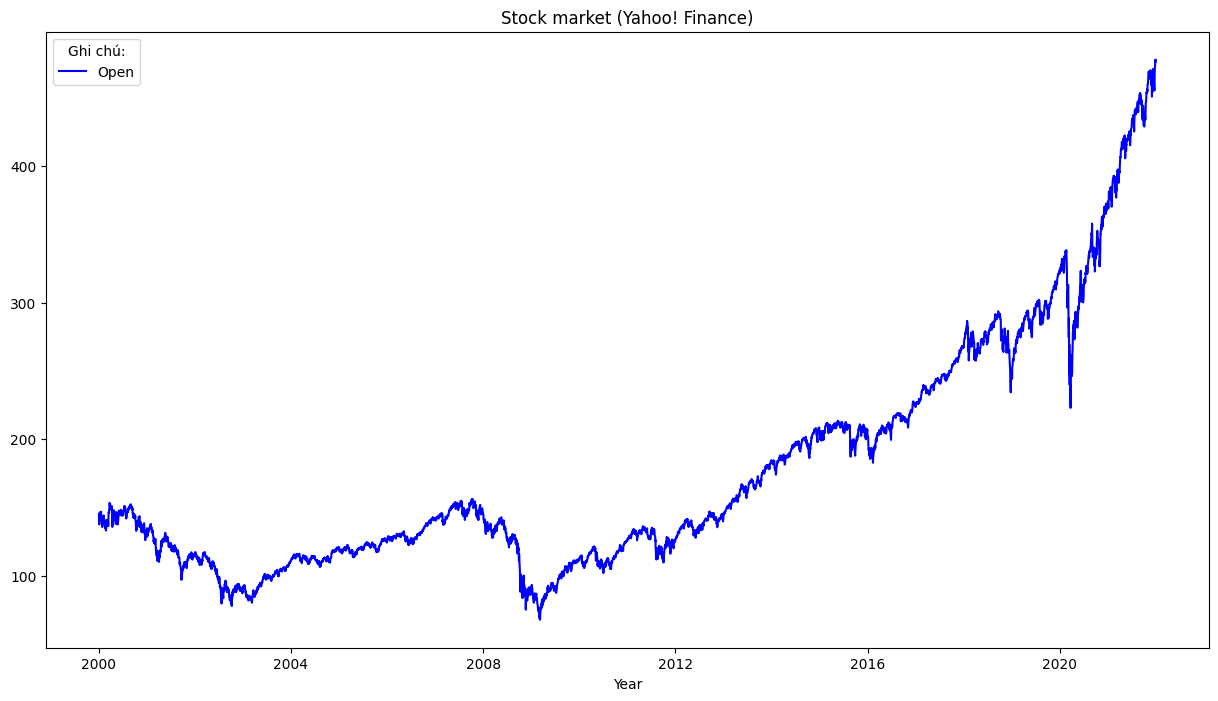

In [ ]:
## Biểu diễn trực quan df['Close']
plt.figure(figsize = (15, 8))
plt.plot(df2, color = 'blue', label = 'Open')
plt.title('Stock market (Yahoo! Finance)')
plt.legend(title = 'Ghi chú:')
plt.xlabel('Year')
plt.show()

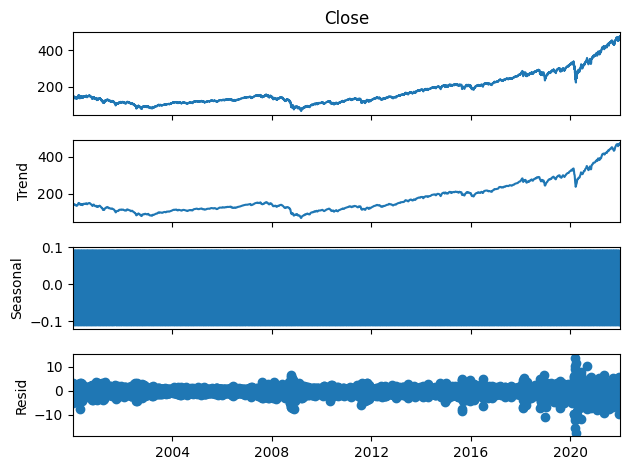

In [ ]:
## Seasonal decomposition dựa trên TRUNG BÌNH ĐỘNG (Moving Average)
## https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.STL.html
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2, model = 'additive', period = 7) # freq = 7

result.plot()
plt.show()

#### *3.3 BACKUP*

In [ ]:
##===============================================================================
## Dữ liệu Time series (CHƯA SỬ DỤNG)
df = pd.read_excel(folder + '/Data/Data.xls', sheet_name = 'Time Series', usecols = ['date', 'qty'])
print(df.head())

## Xử lý cột date (yyyy/mm/yy)
df['idx'] = pd.to_datetime(df['date']).dt.date
df.drop(columns = ['date'], inplace = True)
df.set_index('idx', inplace = True)
print(df.head())
##===============================================================================

                  date        qty
0  1993-06-08 00:00:00  18.977363
1            3/31/1996  52.061552
2            4/23/1993  21.441245
3  2005-04-03 00:00:00  43.074855
4            1/24/1998  45.553861
                  qty
idx                  
1993-06-08  18.977363
1996-03-31  52.061552
1993-04-23  21.441245
2005-04-03  43.074855
1998-01-24  45.553861


In [ ]:
##===============================================================================
## Dữ liệu market data: Yahoo! Finance
# https://pypi.org/project/yfinance/
!pip install yfinance --upgrade --no-cache-dir
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# Download dataframe
data = pdr.get_data_yahoo("SPY", start = "1993-01-29", end = "2021-12-30")
data.to_csv('Yahoo_Finance.csv')
#===============================================================================

In [ ]:
#Tạo ma trận A gần 100 dòng, 100 cột
A = np.random.rand(100, 100)

#Tạo vector ngẫu nhiên gồm 100 phần tử
b = np.random.rand(100)